Programa para el análisis de datos y representaciones de la práctica de propiedades térmicas del máster de materiales de la us del curo 23/24

In [176]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import re

$\Huge{Práctica\ 1:\ -\ Ciclos\ con\ T}$

In [177]:
#   Credit to chatgpt for this function to find files

def load_files_with_pattern(directory, T_file):
    # Compile the regex pattern to match files starting with 'C' followed by a number
    pattern = re.compile(r'^C\d+')
    T_table = pd.read_csv(T_file, header = None)
    T_dict = dict(zip(T_table[1], T_table[0]))
    # Initialize an empty dictionary to store the dataframes
    dataframes = {}

    # Iterate over all files in the specified directory
    for filename in os.listdir(directory):
        # Check if the filename matches the pattern
        if pattern.match(filename):
            # Construct the full file path
            filepath = os.path.join(directory, filename)
            try:
                # Attempt to read the file into a pandas dataframe
                df = pd.read_csv(filepath, header = None)
                temp = T_dict.get(filename, None)
                # Store the dataframe in the dictionary
                dataframes[filename] = (temp, df)
            except Exception as e:
                print(f"Error reading {filename}: {e}")

    return dataframes

In [178]:
#   Find and load all related files: file_name structure: C#.DAT
direc = 'datos_practicas_23_24'
dtfs = load_files_with_pattern(direc, 'temps_ej1.csv')

Tarea 1: Para el ciclo C1.dat, C6.dat y C12.dat, analizad la señal del campo eléctrico frente al tiempo y de la polarización frente al tiempo, discutiendo cómo se relaciona con el carácter ferroeléctrico o paraeléctrico de la muestra.

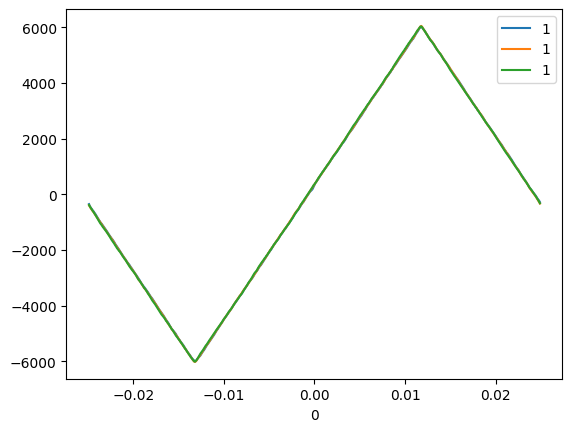

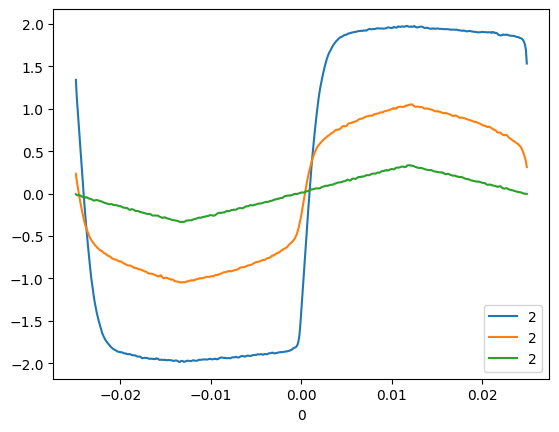

In [179]:
list_of_cicles = ['C1.DAT', 'C6.DAT', 'C12.DAT']
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
fig2 = plt.figure()
ax2 = fig2.add_subplot(1,1,1)
for i in list_of_cicles:
    dtfs[i][1].plot(x = 0, y = 1, ax=ax)
    dtfs[i][1].plot(x = 0, y = 2, ax=ax2)
  #  print(dtfs[i][1])

$\Huge{Practica\ 2:\ Constante\ Dielectrica}$

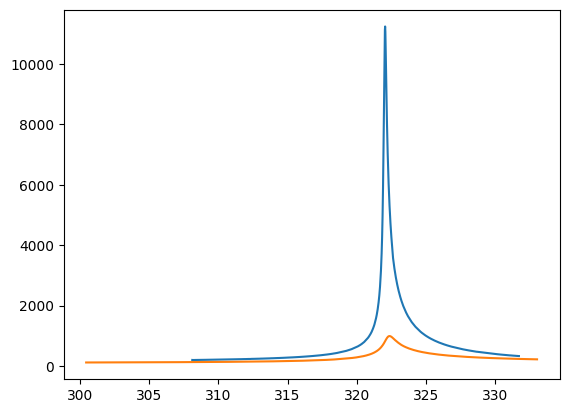

In [180]:
e0 = 8.85e-12
S_TGS = 64e-6
d_TGS = 2.1e-3
S_LATGS = 86e-6
d_LATGS = 2.2e-3

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

C_TGS = pd.read_csv('datos_practicas_23_24/cd_tgs.dat', header=None)
C_LATGS = pd.read_csv('datos_practicas_23_24/cd_latgs.dat', header=None)

e_TGS = C_TGS [1] * d_TGS / e0 / S_TGS
e_LATGS = C_LATGS [1] * d_LATGS / e0 / S_LATGS

ax.plot(C_TGS[0].loc[:], e_TGS.loc[:])
ax.plot(C_LATGS[0].loc[:], e_LATGS.loc[:])

$\Huge{Practica\ 3:\ Coeficiente\ piro}$

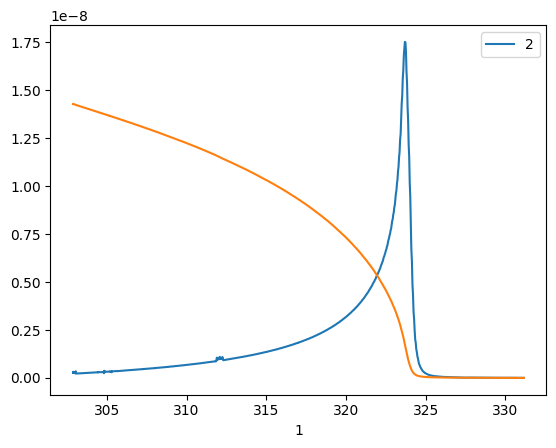

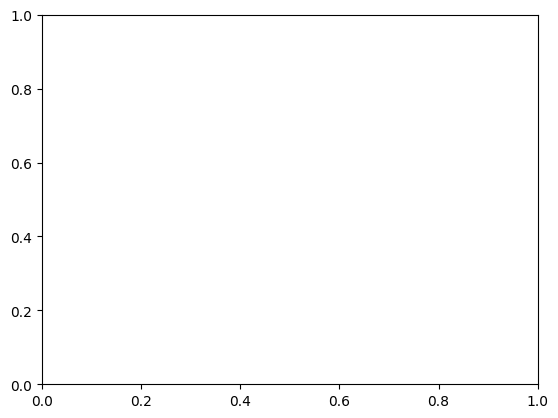

In [181]:
#   Load Data

from scipy.integrate import cumtrapz

S = 64
data = pd.read_csv('datos_practicas_23_24/piro_tgs.dat', header=None)
pi = data[2] / (data[3] * S)
data.plot(x = 1, y = 2)
P = cumtrapz(pi, data[1])
plt.plot(data[1].loc[:len(P)-1], P)


Figura de mérito

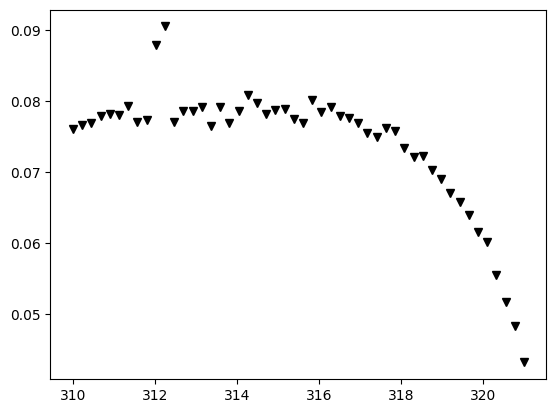

In [186]:
#    Load c data
rho = 1.69
c = pd.read_csv('datos_practicas_23_24/calorespecifico.dat', header=None)
cSv = c[1] * rho
T = np.linspace(310, 321, 50)
Fv = []
for i in T:
    df_closest_e = e_TGS.iloc[(C_TGS[0]-i).abs().argsort()[:1]]
    df_closest_cSv = cSv.iloc[(c[0]-i).abs().argsort()[:1]]
    df_closest_pi = pi.iloc[(data[1]-i).abs().argsort()[:1]]
    Fv.append(-df_closest_pi.to_list()[0] / (e0 * df_closest_e.to_list()[0] * df_closest_cSv.to_list()[0]))
plt.plot(T, Fv, 'kv')